# stuff covered
- Datasets
- Models
- Losses
- Optimizers

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

# Datasets

### A raw dataset

The data are obtained from the model

In [3]:
input_dim = 1
output_dim = 1

A = 2 * np.random.rand(output_dim, input_dim) - 1
b = 2 * np.random.rand(output_dim) - 1

true_model = lambda x : A @ x + b

In [11]:
n_train = 1000
noise_level  = 0.04

X_train = np.random.rand(n_train, input_dim)
y_train = np.array([true_model(x) for x in X_train])

y_train += noise_level * np.random.standard_normal(size=y_train.shape)

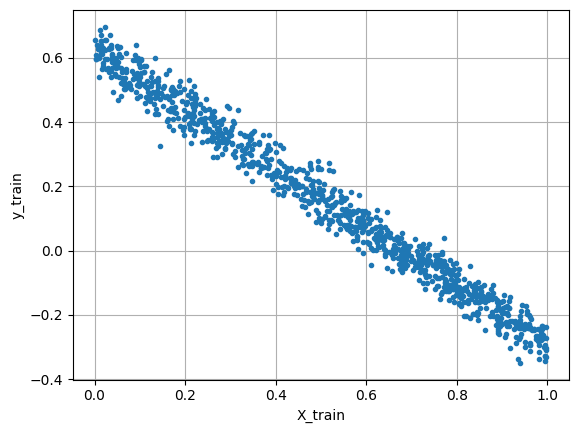

In [12]:
if input_dim == output_dim == 1:
    fig = plt.figure()
    fig.clf()
    ax = fig.clf()
    ax =fig.gca()
    ax.plot(X_train, y_train, '.')
    ax.grid(True)
    ax.set_xlabel('X_train')
    ax.set_ylabel('y_train')

# Pytorch dataset

In [23]:
import torch

class VectorialDataset(torch.utils.data.Dataset):
    def __init__(self, input_data, output_data):
        super(VectorialDataset, self).__init__()
        self.input_data = torch.tensor(input_data.astype('f'))
        self.output_data = torch.tensor(output_data.astype('f'))
    
    def __len__(self):
        return self.input_data.shape[0]
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        sample = (self.input_data[idx, :], self.output_data[idx, :])
        return sample

In [24]:
training_set = VectorialDataset(input_data = X_train,
                               output_data = y_train)

len(training_set)

1000

In [25]:
training_set[10:12]

(tensor([[0.8926],
         [0.8290]]),
 tensor([[-0.2250],
         [-0.2084]]))

In [28]:
batch_size = 120
train_loader = torch.utils.data.DataLoader(training_set,
                                         batch_size = batch_size,
                                         shuffle=True)

In [29]:
for idx, batch in enumerate(train_loader):
    print("Batch n. %2d: input size = %s, output size = %s" % (idx + 1, batch[0].shape, batch[1].shape))

Batch n.  1: input size = torch.Size([120, 1]), output size = torch.Size([120, 1])
Batch n.  2: input size = torch.Size([120, 1]), output size = torch.Size([120, 1])
Batch n.  3: input size = torch.Size([120, 1]), output size = torch.Size([120, 1])
Batch n.  4: input size = torch.Size([120, 1]), output size = torch.Size([120, 1])
Batch n.  5: input size = torch.Size([120, 1]), output size = torch.Size([120, 1])
Batch n.  6: input size = torch.Size([120, 1]), output size = torch.Size([120, 1])
Batch n.  7: input size = torch.Size([120, 1]), output size = torch.Size([120, 1])
Batch n.  8: input size = torch.Size([120, 1]), output size = torch.Size([120, 1])
Batch n.  9: input size = torch.Size([40, 1]), output size = torch.Size([40, 1])


In [30]:
first_batch = []

for epoch in range(2):
    for idx, batch in enumerate(train_loader):
        if idx == 0:
            first_batch.append(batch)

np.c_[X_train[:batch_size], first_batch[0][0].numpy(), first_batch[1][0].numpy()]

array([[0.99441294, 0.88566828, 0.90638602],
       [0.71332327, 0.25848401, 0.09608797],
       [0.3851813 , 0.64516836, 0.68892878],
       [0.31010884, 0.85967344, 0.37709296],
       [0.05905315, 0.281896  , 0.47578371],
       [0.93848683, 0.29293627, 0.00753411],
       [0.50167444, 0.54246819, 0.48315424],
       [0.79054474, 0.89020598, 0.77863574],
       [0.99751762, 0.22161275, 0.10783614],
       [0.96920575, 0.72366333, 0.03943504],
       [0.89263485, 0.45239502, 0.03817135],
       [0.82903649, 0.42025983, 0.80356568],
       [0.66041292, 0.82903647, 0.59217465],
       [0.54318451, 0.57972568, 0.30210105],
       [0.12219063, 0.7035467 , 0.01280502],
       [0.12336011, 0.50322264, 0.78283191],
       [0.57840621, 0.39421234, 0.26313797],
       [0.60122219, 0.28883293, 0.0648143 ],
       [0.23635884, 0.43369856, 0.96331966],
       [0.49244715, 0.87910348, 0.23238443],
       [0.76760602, 0.74016517, 0.81064886],
       [0.124236  , 0.34805065, 0.7856667 ],
       [0.

In [39]:
from torch import nn

class LinearModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearModel, self).__init__()
        
        self.input_dim = input_dim
        self.output_dim = output_dim
        
        self.linear = nn.Linear(self.input_dim, self.output_dim, bias = True)
    
    def forward(self, x):
        out = self.linear(x)
        return out
    
    def reset(self):
        self.linear.reset_parameters()

In [40]:
model = LinearModel(input_dim, output_dim)
print(model)

LinearModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [41]:
list(model.parameters())

[Parameter containing:
 tensor([[0.3284]], requires_grad=True),
 Parameter containing:
 tensor([0.2677], requires_grad=True)]

In [42]:
model.linear.weight

Parameter containing:
tensor([[0.3284]], requires_grad=True)

In [43]:
model.linear.bias

Parameter containing:
tensor([0.2677], requires_grad=True)

In [44]:
x = torch.randn(5, input_dim)
model.forward(x)

tensor([[ 0.3007],
        [ 0.1968],
        [-0.0247],
        [-0.2091],
        [ 0.0771]], grad_fn=<AddmmBackward0>)

In [45]:
[model.linear.weight @ xx + model.linear.bias for xx in x]

[tensor([0.3007], grad_fn=<AddBackward0>),
 tensor([0.1968], grad_fn=<AddBackward0>),
 tensor([-0.0247], grad_fn=<AddBackward0>),
 tensor([-0.2091], grad_fn=<AddBackward0>),
 tensor([0.0771], grad_fn=<AddBackward0>)]

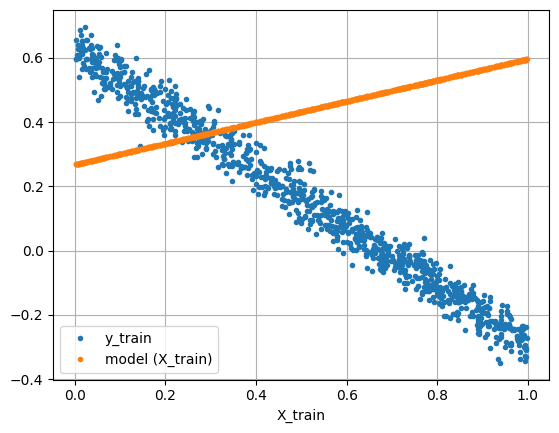

In [46]:
if input_dim == output_dim == 1:
    fig = plt.figure()
    fig.clf()
    ax = fig.gca()
    ax.plot(training_set.input_data, training_set.output_data, '.')
    ax.plot(training_set.input_data, model.forward(training_set.input_data).detach().numpy(), '.')
    ax.grid(True)
    ax.set_xlabel('X_train')
    ax.legend(['y_train', 'model (X_train)'])

In [50]:
loss_fn = nn.MSELoss(reduction = 'mean')

In [51]:
x = torch.tensor(np.array([1, 2, 1]).astype('f'))
z = torch.tensor(np.array([0, 0, 0]).astype('f'))

loss_fn(x, z)

tensor(2.)

In [52]:
x = torch.randn(1, input_dim)
y = torch.randn(1, output_dim)

model.zero_grad()
loss = loss_fn(model.forward(x), y)
loss.backward()

In [56]:
if input_dim == output_dim == 1:
    print(model.linear.weight.grad)
    print(2 * x * (model.linear.weight * x + model.linear.bias - y))
    
    print(model.linear.bias.grad)
    print(2 * (model.linear.weight * x + model.linear.bias - y))

tensor([[1.2780]])
tensor([[1.2780]], grad_fn=<MulBackward0>)
tensor([3.1227])
tensor([[3.1227]], grad_fn=<MulBackward0>)
